In [15]:
from sklearn.datasets import load_boston

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = load_boston()

In [18]:
data = pd.DataFrame(df.data)
data.columns = df.feature_names
data["price"] = df.target

In [19]:
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [20]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

### Linear Regression

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
# lin_regressor.fit(x,y)
# cv = cross validation
mse = cross_val_score(lin_regressor, x , y, scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-37.13180746769922


### Ridge Regression

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [23]:
ridge = Ridge()
# 1e-15 : 10^8 - 15
params = {"alpha" : [1e-15,1e-10,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 0.01, 1, 5, 10, 20, 30, 35, 40,
                                   45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [24]:
# best value of alpha
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.90570194754033


### Lasso Regression

In [25]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [26]:
lasso = Lasso()
# 1e-15 : 10^8 - 15
params = {"alpha" : [1e-15,1e-10,1e-2,1,5,15,50,55,60,80]}
lasso_regressor = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.746729651311, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.459304778431, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796.653037433508, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 0.01, 1, 5, 15, 50, 55, 60,
                                   80]},
             scoring='neg_mean_squared_error')

In [27]:
# best value of alpha
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.531580220694856


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [29]:
pred_lasso = lasso_regressor.predict(x_test)
pred_ridge = ridge_regressor.predict(x_test)

### Distance Plots

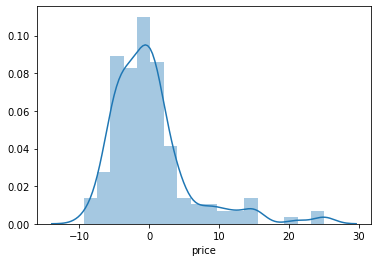

In [30]:
import seaborn as sns
sns.distplot(y_test - pred_lasso)

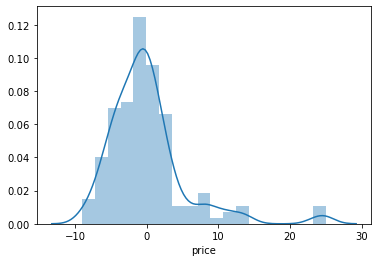

In [31]:
sns.distplot(y_test - pred_ridge)